### Using the dataset to train a model

In [1]:
import tensorflow.keras as kr

# Numerical arrays
import numpy as np

# Data frames.
import pandas as pd

# Plotting
import matplotlib.pyplot as plt

# neural neworks
import tensorflow.keras as kr

In [2]:
# Plot style.
plt.style.use("ggplot")

# Plot size.
plt.rcParams['figure.figsize'] = [14, 8]

<AxesSubplot:xlabel='speed', ylabel='power'>

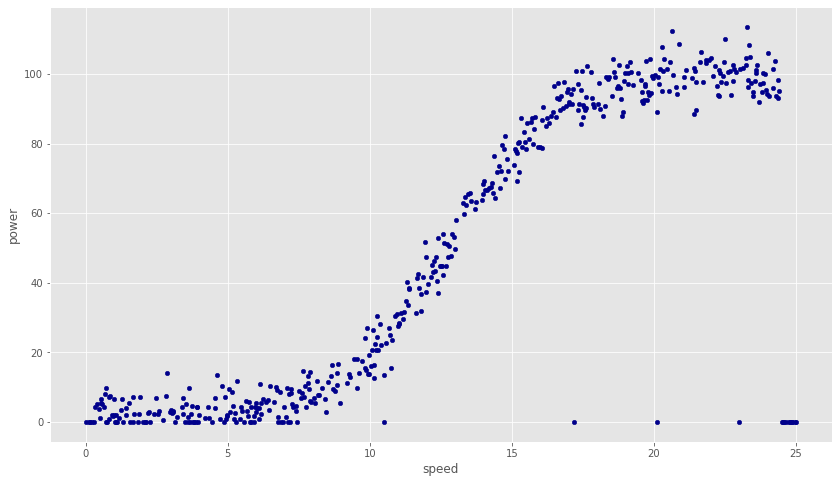

In [25]:
data = pd.read_csv('power_production.csv')
data.plot.scatter(x='speed',
                      y='power',
                      c='DarkBlue')

<AxesSubplot:xlabel='speed', ylabel='power'>

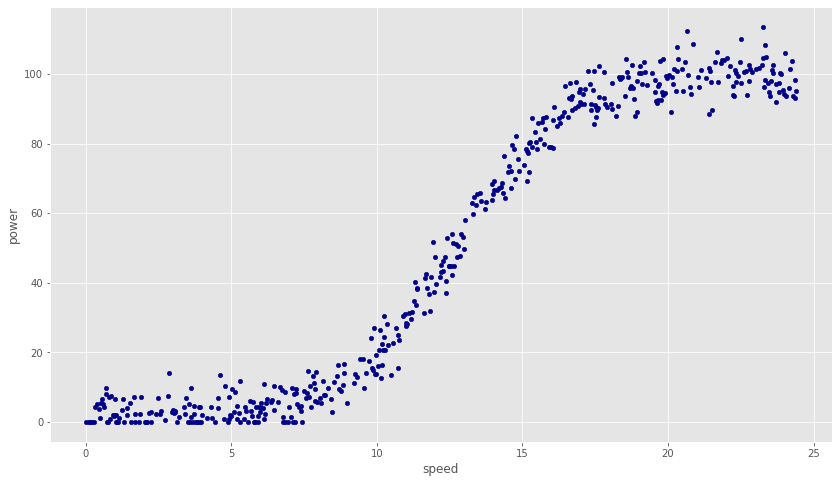

In [26]:
data = pd.read_csv('power_production.csv')
## drop rows where the power putput is zero even though wind speed > 10
df_new = data.drop(data[(data['speed'] > 10.0) & (data['power'] == 0.0)].index)   # https://stackoverflow.com/questions/52456874/drop-rows-on-multiple-conditions-in-pandas-dataframe
df_new.plot.scatter(x='speed',
                      y='power',
                      c='DarkBlue')

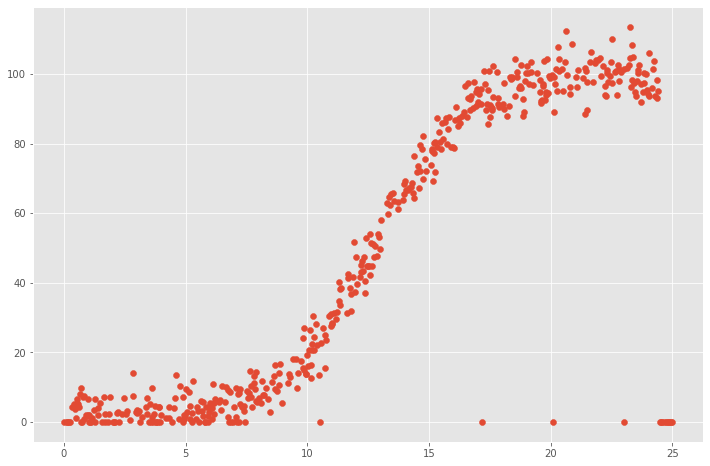

In [4]:
power_data = np.genfromtxt("power_production.csv", delimiter=",", names=["x", "y"])
fig=plt.figure(figsize=(12,8))  # adapted from https://stackoverflow.com/questions/36367986/how-to-make-inline-plots-in-jupyter-notebook-larger
plt.scatter(power_data['x'], power_data['y'])


The curve produced by plotting wind-speed against power output is s-shaped. This suggests that power output is quite small at low wind speeds, climbs sharply after a certain speed and then much more slowly before it reaches a maximum. The characteristic shape of the graph is explained by [this article](https://now.tufts.edu/articles/how-do-windmills-create-electricity) on how windmills create energy. It seems that if the turbine is moving quite slowly, electricity is not creatyed. Energy starts to be created at what is known as the cut-in speed/ After the cut-in point energy is created at a fast rate but this rate starts to slow until it reaches its maximum rated wins speed. SAbove this point, the power output remains constant. We can see this as the top of the s-shape in the graph. Wind turbines also have a cut-out speed, at which a brake stops the winds rotation. I wonder if some of the zero value power outputs we see can be explained by problems caused by high wind speed.
[https://now.tufts.edu/articles/how-do-windmills-create-electricity]

## S-shaped curves

I'm struck by the shape of the curve produce by the relationship between wind speed and power output, the related sigmoid function and the mechanism of firing neurons as described in the lectures on neural networks. The way that neurons need a build up of signals before firing strikes me as similar to the way the wind turbines have a cut-in speed, after which they start to produce electricity. The sigmoid function is described in the lectures as like an on/off switch. Is there a relationship between the activation function and thr function needed to describe the power output from wind turbines?
[https://en.wikipedia.org/wiki/Sigmoid_function]

In [19]:
train = pd.DataFrame()
msk = np.random.rand(len(df_new)) < 0.8
train = df_new[msk]
test = df_new[~msk]
train_x = train.iloc[:,0]
train_x
train_y = train.iloc[:,1]
train_y
test_x = test.iloc[:,0]
test_x
test_y = test.iloc[:,1]
test_y
# https://stackoverflow.com/questions/24147278/how-do-i-create-test-and-train-samples-from-one-dataframe-with-pandas

0        0.000
3        0.000
10       6.498
16       0.000
20       1.996
        ...   
476     97.334
480     94.270
485    103.700
487     93.078
489     95.117
Name: power, Length: 103, dtype: float64

In [20]:
# Train a model.
m = kr.models.Sequential()
m.add(kr.layers.Dense(50, input_shape=(1,), activation='sigmoid', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
m.add(kr.layers.Dense(1, activation='linear', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
m.compile(kr.optimizers.Adam(lr=0.001), loss='mean_squared_error')

In [21]:
# Fit the data.
m.fit(train_x, train_y, epochs=500, batch_size=10)

Epoch 1/500
39/39 [==============================] - 0s 905us/step - loss: 3986.8098
Epoch 2/500
39/39 [==============================] - 0s 936us/step - loss: 3846.1907
Epoch 3/500
39/39 [==============================] - 0s 868us/step - loss: 3702.5989
Epoch 4/500
39/39 [==============================] - 0s 858us/step - loss: 3534.4634
Epoch 5/500
39/39 [==============================] - 0s 869us/step - loss: 3326.2083
Epoch 6/500
39/39 [==============================] - 0s 921us/step - loss: 3129.6074
Epoch 7/500
39/39 [==============================] - 0s 921us/step - loss: 2977.0117
Epoch 8/500
39/39 [==============================] - 0s 844us/step - loss: 2851.7361
Epoch 9/500
39/39 [==============================] - 0s 869us/step - loss: 2739.6074
Epoch 10/500
39/39 [==============================] - 0s 946us/step - loss: 2632.7104
Epoch 11/500
39/39 [==============================] - 0s 869us/step - loss: 2539.2468
Epoch 12/500
39/39 [==============================] - 0s 844us/

39/39 [==============================] - 0s 972us/step - loss: 156.5128
Epoch 98/500
39/39 [==============================] - 0s 818us/step - loss: 153.2077
Epoch 99/500
39/39 [==============================] - 0s 767us/step - loss: 148.2265
Epoch 100/500
39/39 [==============================] - 0s 844us/step - loss: 144.6855
Epoch 101/500
39/39 [==============================] - 0s 895us/step - loss: 141.0336
Epoch 102/500
39/39 [==============================] - 0s 793us/step - loss: 137.4962
Epoch 103/500
39/39 [==============================] - 0s 793us/step - loss: 134.3073
Epoch 104/500
39/39 [==============================] - 0s 844us/step - loss: 130.9597
Epoch 105/500
39/39 [==============================] - 0s 818us/step - loss: 127.8746
Epoch 106/500
39/39 [==============================] - 0s 818us/step - loss: 125.5726
Epoch 107/500
39/39 [==============================] - 0s 793us/step - loss: 122.0992
Epoch 108/500
39/39 [==============================] - 0s 818us/step -

39/39 [==============================] - 0s 818us/step - loss: 50.8300
Epoch 194/500
39/39 [==============================] - 0s 895us/step - loss: 50.0660
Epoch 195/500
39/39 [==============================] - 0s 767us/step - loss: 49.7631
Epoch 196/500
39/39 [==============================] - 0s 895us/step - loss: 49.2266
Epoch 197/500
39/39 [==============================] - 0s 793us/step - loss: 49.0613
Epoch 198/500
39/39 [==============================] - 0s 844us/step - loss: 48.8206
Epoch 199/500
39/39 [==============================] - 0s 742us/step - loss: 48.2585
Epoch 200/500
39/39 [==============================] - 0s 767us/step - loss: 48.0476
Epoch 201/500
39/39 [==============================] - 0s 793us/step - loss: 47.9265
Epoch 202/500
39/39 [==============================] - 0s 844us/step - loss: 47.6193
Epoch 203/500
39/39 [==============================] - 0s 742us/step - loss: 46.7150
Epoch 204/500
39/39 [==============================] - 0s 767us/step - loss: 46

39/39 [==============================] - 0s 767us/step - loss: 23.9069
Epoch 290/500
39/39 [==============================] - 0s 869us/step - loss: 23.7781
Epoch 291/500
39/39 [==============================] - 0s 767us/step - loss: 23.4948
Epoch 292/500
39/39 [==============================] - 0s 793us/step - loss: 23.5087
Epoch 293/500
39/39 [==============================] - 0s 742us/step - loss: 23.4149
Epoch 294/500
39/39 [==============================] - 0s 742us/step - loss: 23.3056
Epoch 295/500
39/39 [==============================] - 0s 742us/step - loss: 23.1762
Epoch 296/500
39/39 [==============================] - 0s 844us/step - loss: 22.9459
Epoch 297/500
39/39 [==============================] - 0s 742us/step - loss: 22.9266
Epoch 298/500
39/39 [==============================] - 0s 818us/step - loss: 22.8828
Epoch 299/500
39/39 [==============================] - 0s 818us/step - loss: 22.7432
Epoch 300/500
39/39 [==============================] - 0s 793us/step - loss: 22

39/39 [==============================] - 0s 844us/step - loss: 17.5518
Epoch 386/500
39/39 [==============================] - 0s 895us/step - loss: 17.4662
Epoch 387/500
39/39 [==============================] - 0s 844us/step - loss: 17.4091
Epoch 388/500
39/39 [==============================] - 0s 793us/step - loss: 17.3687
Epoch 389/500
39/39 [==============================] - 0s 818us/step - loss: 17.3183
Epoch 390/500
39/39 [==============================] - 0s 793us/step - loss: 17.4479
Epoch 391/500
39/39 [==============================] - 0s 869us/step - loss: 17.3220
Epoch 392/500
39/39 [==============================] - ETA: 0s - loss: 17.32 - 0s 793us/step - loss: 17.3466
Epoch 393/500
39/39 [==============================] - 0s 793us/step - loss: 17.2801
Epoch 394/500
39/39 [==============================] - 0s 793us/step - loss: 17.3892
Epoch 395/500
39/39 [==============================] - 0s 818us/step - loss: 17.3428
Epoch 396/500
39/39 [==============================] - 

39/39 [==============================] - 0s 869us/step - loss: 16.7945
Epoch 482/500
39/39 [==============================] - 0s 921us/step - loss: 15.8827
Epoch 483/500
39/39 [==============================] - 0s 869us/step - loss: 15.9110
Epoch 484/500
39/39 [==============================] - 0s 997us/step - loss: 15.8129
Epoch 485/500
39/39 [==============================] - 0s 793us/step - loss: 15.7907
Epoch 486/500
39/39 [==============================] - 0s 767us/step - loss: 15.9200
Epoch 487/500
39/39 [==============================] - 0s 767us/step - loss: 15.9018
Epoch 488/500
39/39 [==============================] - 0s 793us/step - loss: 15.7986
Epoch 489/500
39/39 [==============================] - 0s 844us/step - loss: 16.1836
Epoch 490/500
39/39 [==============================] - 0s 818us/step - loss: 15.7824
Epoch 491/500
39/39 [==============================] - 0s 869us/step - loss: 15.7084
Epoch 492/500
39/39 [==============================] - 0s 869us/step - loss: 15

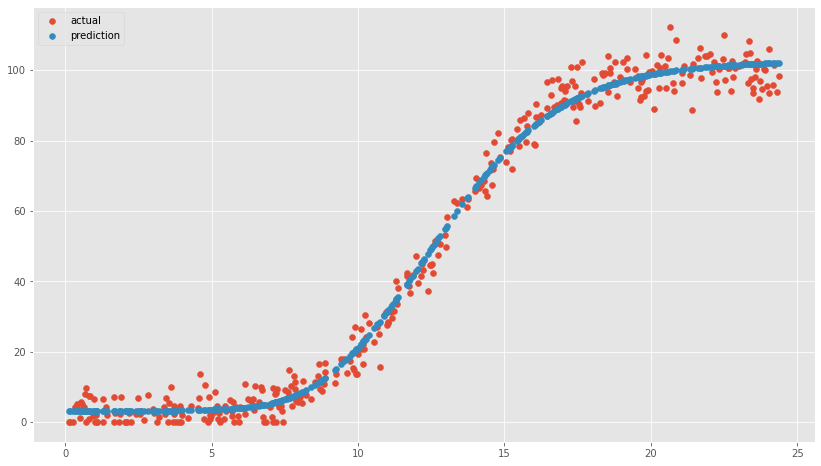

In [22]:
# Now let's see.
plt.scatter(train_x, train_y, label='actual')
plt.scatter(train_x, m.predict(train_x), label='prediction')
plt.legend();

In [9]:
# create a new neural network
m = kr.models.Sequential()

# Add a single neuron in a single layer, initialised with weight 1 and bias 0.
# dense: everything in current layer connected to every thing in previous layer
# 1: number of neurons in the layer
# input_dim=1  number of dimensions in input is 1 (1 input)
# linear activation function
m.add(kr.layers.Dense(1, input_dim=1, activation="linear", kernel_initializer='ones', bias_initializer='zeros'))

# Compile the model.
# bog standard to optimize - optimizer="sgd"
# loss="mean_squared_error" ... cost function
m.compile(loss="mean_squared_error", optimizer="sgd")

In [10]:
# Create some input values.
x = np.arange(-10.0, 10.1, 1.0)

# Run each x value through the neural network.
y = m.predict(x)

In [11]:
# Have a look at x.
x

array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.])

In [12]:
y

array([[-10.],
       [ -9.],
       [ -8.],
       [ -7.],
       [ -6.],
       [ -5.],
       [ -4.],
       [ -3.],
       [ -2.],
       [ -1.],
       [  0.],
       [  1.],
       [  2.],
       [  3.],
       [  4.],
       [  5.],
       [  6.],
       [  7.],
       [  8.],
       [  9.],
       [ 10.]], dtype=float32)